In [8]:
import matplotlib
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def printMap(level):
    pixel_plot = plt.figure()
    pixel_plot.add_subplot()
    plt.title("Map")
    pixel_plot = plt.imshow(level, cmap='Greens', interpolation='nearest', origin='upper', vmax=5)
    plt.colorbar(pixel_plot)
    plt.show()

def putPixel(level, position, value):
    x = position[0]
    y = position[1]
    level[y][x] = value

In [9]:
class SearchNode:
    def __init__(self, state, action=-1, prevNode=None):
        self.state = state
        self.action = action
        self.prevNode = prevNode

def traversePath(node, visitFunc):
    if (node == None):
        return # rekursion loppuehto
    traversePath(node.prevNode, visitFunc)
    visitFunc(node)

In [10]:
def breadthFirstSearch(agentState, isGoal, branch):
    # lisää alkutila open listiin
    openList = [SearchNode(agentState)]
    closedList = []
    goaledNode = None

    def isInClosedList(node):
        for n in closedList:
            if(node.state == n.state):
                return True #löytyi
        return False #ei löytynyt

    while len(openList) > 0 and goaledNode == None:
        currentNode = openList[0]
        openList.pop(0)
        if(isInClosedList(currentNode)):
            continue

        # lisää solmu closed listaan
        closedList.append(currentNode)
        if isGoalFound(currentNode):
            goaledNode = currentNode
            continue

        # Laske seuraavat naapurisolmut
        adjacentNodes = branch(currentNode) # kutsu branch funktiota kanditaattien saamiseksi
        for n in adjacentNodes:
            openList.append(n)  


    return goaledNode

In [11]:
# Ratkaistava ongelma

#alkutilanne:
initialState = [0, 0]

# maalifunktio:
def isGoalFound(node):
    return node.state[0] == 4 and node.state[1] == 6  # goal tilassa 4, 6

# actionit taulukoituna: (4 suuntaa)
actions = [[-1, 0], [1, 0],[0, -1], [0, 1]]

# Suorittaa annetun actionin nykyisestä tilasta eteenpäin
def makeAction(currentState, actionId):
    deltaAction = actions[actionId]
    newState = []
    for i in range(len(currentState)):
        newState.append(currentState[i]+deltaAction[i])
    return newState

# Suorittaa actionin nykyiseen tilaan ja tekee uuden solmun
def stepAction(prevNode, actionId):
    newState = makeAction(prevNode.state, actionId)
    return SearchNode(newState, actionId, prevNode)

def getNextNodes(prevNode):
    NextNodes = []
    for actionId in range(len(actions)):
        NextNodes.append(stepAction(prevNode,actionId)) # type: ignore
    return NextNodes

In [12]:
goaledNode = breadthFirstSearch(initialState, isGoalFound, getNextNodes)

In [14]:
def printNode(node):
    print("State:" + str(node.state) + "Action: " + str(node.action))

traversePath(goaledNode, printNode)

State:[0, 0]Action: -1
State:[1, 0]Action: 1
State:[2, 0]Action: 1
State:[3, 0]Action: 1
State:[4, 0]Action: 1
State:[4, 1]Action: 3
State:[4, 2]Action: 3
State:[4, 3]Action: 3
State:[4, 4]Action: 3
State:[4, 5]Action: 3
State:[4, 6]Action: 3


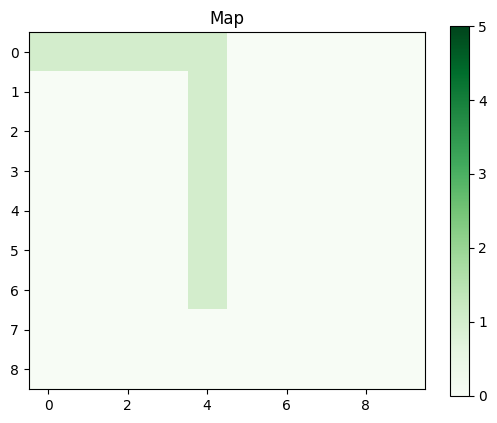

In [16]:
level = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

def printNodeOnLevel(node):
    putPixel(level, node.state, 1)

traversePath(goaledNode, printNodeOnLevel)

printMap(level)

[Source](https://www.youtube.com/watch?v=Q30m_-8nh3Y&list=PLadRxrHJkUqzoVmzO-CQWwhO93IAjChOp&index=18)